# Benchmark TME cellularity estimations

Script related to figure 3a

### Aim:
- Benchmark TME cellularity scores using WES derived tumour cellularity as benchmark data set

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

In [18]:
import scipy

In [19]:
scipy.__version__

'1.4.1'

In [20]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [21]:
ls ../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt

../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt


In [22]:
file_keys = home + 'Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [23]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


## Load methods' TME cellularity estimates

### Bindea

In [24]:
ls ../../Data/3/BindeaTMEcellularity_TreatmentNaive_NES.txt

../../Data/3/BindeaTMEcellularity_TreatmentNaive_NES.txt


In [25]:
bin_TMEcell = pd.read_csv('../../Data/3/BindeaTMEcellularity_TreatmentNaive_NES.txt',
                          sep='\t',
                          index_col='Term').T

In [26]:
bin_TMEcell.head()

Term,Bindea_TMEcell
A01,0.749201
A02,0.991710
A03,1.059214
A04,0.809765
A05,0.725904


### Davoli

In [27]:
ls ../../Data/3/DavoliTMEcellularity_TreatmentNaive_NES.txt

../../Data/3/DavoliTMEcellularity_TreatmentNaive_NES.txt


In [28]:
dav_TMEcell = pd.read_csv('../../Data/3/DavoliTMEcellularity_TreatmentNaive_NES.txt',
                          sep='\t',
                          index_col='Term').T

In [29]:
dav_TMEcell.head()

Term,Davoli_TMEcell
A01,0.009751
A02,0.363342
A03,0.260787
A04,-0.181239
A05,-0.153725


### Danaher

In [30]:
ls ../../Data/3/DanaherTMEcellularity_TreatmentNaive_NES.txt

../../Data/3/DanaherTMEcellularity_TreatmentNaive_NES.txt


In [31]:
dan_TMEcell = pd.read_csv('../../Data/3/DanaherTMEcellularity_TreatmentNaive_NES.txt',
                          sep='\t',
                          index_col='Term').T

In [32]:
dan_TMEcell.head()

Term,Danaher_TMEcell
A01,-0.498688
A02,-0.378338
A03,-0.349832
A04,-1.030722
A05,-0.711740


### MCP counter

In [33]:
ls ../../Data/3/MCPcounterTMEcellularity_TreatmentNaive_Results.txt

../../Data/3/MCPcounterTMEcellularity_TreatmentNaive_Results.txt


In [34]:
mcp_TMEcell = pd.read_csv('../../Data/3/MCPcounterTMEcellularity_TreatmentNaive_Results.txt',
                          sep='\t',
                          index_col='Term').T

In [35]:
mcp_TMEcell.head()

Term,MCP_TMEcellularity
A01,52.921805
A02,54.331328
A03,54.552966
A04,50.375172
A05,50.768222


In [36]:
mcp_TMEcell.rename(columns={'MCP_TMEcellularity':'MCP_TMEcell'},
                   inplace=True)

In [37]:
mcp_TMEcell.head()

Term,MCP_TMEcell
A01,52.921805
A02,54.331328
A03,54.552966
A04,50.375172
A05,50.768222


### CIBERSORT absolute

In [38]:
ls ../../Data/3/CIBERSORT_absolute_TreatmentNaive_Results.txt

../../Data/3/CIBERSORT_absolute_TreatmentNaive_Results.txt


In [39]:
cib_abs_results = pd.read_csv('../../Data/3/CIBERSORT_absolute_TreatmentNaive_Results.txt',
                              sep='\t',
                              index_col='Mixture')

In [40]:
cib_abs_results.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE,Absolute score (sig.score)
Mixture,,,,,,,,,,,,,,,,,,,,,
A01,0.021557,0.000000,0.315502,0.0,0.000000,0.088324,0.033568,0.0,0.00000,0.027776,...,0.014450,0.000000,0.041463,0.0,0.019144,0.018094,0.0,0.742259,0.689899,0.663951
A02,0.000083,0.000000,0.241360,0.0,0.000000,0.116493,0.007963,0.0,0.00000,0.102854,...,0.002606,0.027973,0.038371,0.0,0.023381,0.007771,0.0,0.594326,0.807266,0.637033
A03,0.000000,0.000000,0.286786,0.0,0.000000,0.188860,0.028038,0.0,0.00000,0.040406,...,0.006859,0.000000,0.027099,0.0,0.004736,0.015791,0.0,0.685774,0.740759,0.650632
A04,0.000000,0.027127,0.292471,0.0,0.032608,0.052369,0.000000,0.0,0.00518,0.000000,...,0.000000,0.052431,0.019916,0.0,0.003215,0.005984,0.0,0.673854,0.742165,0.580156
A05,0.000000,0.017532,0.298348,0.0,0.013684,0.104442,0.032678,0.0,0.00000,0.000000,...,0.000000,0.003416,0.025481,0.0,0.014741,0.000000,0.0,0.761541,0.668641,0.592368


### Calculate samples TME cellularity based on CIBERSORT absolute score

In [41]:
# Remove columns that are not cells
cib_not_cells = ['P-value',
                 'Correlation',
                 'RMSE',
                 'Absolute score (sig.score)']

cib_abs_TMEcell = cib_abs_results.drop(labels=cib_not_cells,
                                       axis='columns').sum(axis='columns')

In [42]:
cib_abs_TMEcell.head()

Mixture
A01    0.663951
A02    0.637033
A03    0.650632
A04    0.580156
A05    0.592368
dtype: float64

In [43]:
cib_abs_TMEcell_df = pd.DataFrame({'Term':cib_abs_results.index,
                                   'CIBERSORT_abs_TMEcell':cib_abs_TMEcell})

cib_abs_TMEcell_df.set_index('Term',
                             inplace=True)

In [44]:
cib_abs_TMEcell_df.head()

,CIBERSORT_abs_TMEcell
Term,
A01,0.663951
A02,0.637033
A03,0.650632
A04,0.580156
A05,0.592368


### CIBERSORT relative

In [45]:
ls ../../Data/3/CIBERSORT_relative_TreatmentNaive_Results.txt

../../Data/3/CIBERSORT_relative_TreatmentNaive_Results.txt


In [46]:
cib_rel_results = pd.read_csv('../../Data/3/CIBERSORT_relative_TreatmentNaive_Results.txt',
                              sep='\t',
                              index_col='Mixture')

In [47]:
cib_rel_results.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,,,,,,,,,,
A01,0.032468,0.000000,0.475189,0.0,0.000000,0.133028,0.050558,0.0,0.000000,0.041834,...,0.004301,0.021764,0.000000,0.062449,0.0,0.028833,0.027253,0.0,0.742259,0.689899
A02,0.000130,0.000000,0.378881,0.0,0.000000,0.182869,0.012499,0.0,0.000000,0.161458,...,0.007450,0.004091,0.043911,0.060234,0.0,0.036704,0.012199,0.0,0.594326,0.807266
A03,0.000000,0.000000,0.440781,0.0,0.000000,0.290271,0.043093,0.0,0.000000,0.062102,...,0.008338,0.010542,0.000000,0.041650,0.0,0.007278,0.024270,0.0,0.685774,0.740759
A04,0.000000,0.046759,0.504124,0.0,0.056206,0.090266,0.000000,0.0,0.008929,0.000000,...,0.064709,0.000000,0.090374,0.034329,0.0,0.005541,0.010315,0.0,0.673854,0.742165
A05,0.000000,0.029596,0.503654,0.0,0.023101,0.176313,0.055165,0.0,0.000000,0.000000,...,0.024411,0.000000,0.005766,0.043016,0.0,0.024886,0.000000,0.0,0.761541,0.668641


In [48]:
# Remove columns that are not cells
cib_not_cells = ['P-value',
                 'Correlation',
                 'RMSE']

cib_rel_TMEcell = cib_rel_results.drop(labels=cib_not_cells,
                                       axis='columns').sum(axis='columns')

### Check samples total immune scores

In [49]:
set(cib_rel_TMEcell.round())

{1.0}

### Calculate samples TME cellularity based on CIBERSORT absolute score

#### Cibersort relative values add to 1, so we use here the p value as an indication of purity, since the p-value reflects the deconvolution goodness of fit which depends to some extent to the amount of infiltrating cells. https://cibersort.stanford.edu/manual.php

In [50]:
# Multiply the p-value times -1 because the more tumour cellularity the higher the p-value
cib_rel_TMEcell_df = pd.DataFrame({
    'Term':cib_rel_results.index,
    'CIBERSORT_rel_TMEcell':cib_rel_results['P-value']*-1
})

cib_rel_TMEcell_df.set_index('Term',
                          inplace=True)

In [51]:
cib_rel_TMEcell_df.head()

,CIBERSORT_rel_TMEcell
Term,
A01,-0.0
A02,-0.0
A03,-0.0
A04,-0.0
A05,-0.0


### xCELL TME cellularity

In [52]:
ls ../../Data/3/xCell_TreatmentNaive_Results.txt

../../Data/3/xCell_TreatmentNaive_Results.txt


In [53]:
xcell_TMEcell = pd.read_csv('../../Data/3/xCell_TreatmentNaive_Results.txt',
                            sep='\t',
                            index_col=0).T

In [54]:
xcell_TMEcell.head()

,Adipocytes,Astrocytes,B-cells,Basophils,CD4+ T-cells,CD4+ Tcm,CD4+ Tem,CD4+ memory T-cells,CD4+ naive T-cells,CD8+ T-cells,...,cDC,iDC,ly Endothelial cells,mv Endothelial cells,naive B-cells,pDC,pro B-cells,ImmuneScore,StromaScore,MicroenvironmentScore
A01,0.1906,0.0000,0.0000,0.0681,0.0926,0.0000,0.1002,0.1544,0.0267,0.0548,...,0.0689,0.0000,0.0702,0.0000,0.0000,0.0168,0.0128,0.4338,0.2100,0.6438
A02,0.2367,0.0000,0.0580,0.0000,0.2097,0.0584,0.1394,0.3051,0.0000,0.0687,...,0.0237,0.0006,0.0000,0.0000,0.0146,0.0650,0.0120,0.4595,0.1854,0.6449
A03,0.2781,0.0000,0.0555,0.0000,0.1427,0.0280,0.1078,0.1985,0.0000,0.0762,...,0.1065,0.0641,0.0790,0.0659,0.0000,0.0067,0.0597,0.5284,0.2632,0.7916
A04,0.0308,0.0068,0.0199,0.0500,0.1017,0.1867,0.0000,0.0400,0.0116,0.0000,...,0.0000,0.0000,0.0205,0.0329,0.0000,0.0000,0.0355,0.3285,0.0271,0.3556
A05,0.0350,0.0000,0.0336,0.0000,0.0987,0.0125,0.0430,0.1371,0.0000,0.0000,...,0.0146,0.0000,0.0328,0.0000,0.0000,0.0102,0.0348,0.3736,0.1007,0.4743


In [55]:
xcell_TMEcell = xcell_TMEcell.MicroenvironmentScore

In [56]:
xcell_TMEcell.head()

A01    0.6438
A02    0.6449
A03    0.7916
A04    0.3556
A05    0.4743
Name: MicroenvironmentScore, dtype: float64

In [57]:
xcell_TMEcell_df = pd.DataFrame({
    'Index':xcell_TMEcell.index,
    'xcell_TMEcell':xcell_TMEcell
})

xcell_TMEcell_df.set_index('Index',
                           inplace=True)

In [58]:
xcell_TMEcell_df.head()

,xcell_TMEcell
Index,
A01,0.6438
A02,0.6449
A03,0.7916
A04,0.3556
A05,0.4743


### Consensus TME cellularity

In [59]:
ls ../../Data/3/ConsensusTMEcellularity_TreatmentNaive_NES.txt

../../Data/3/ConsensusTMEcellularity_TreatmentNaive_NES.txt


In [60]:
con_TMEcell = pd.read_csv('../../Data/3/ConsensusTMEcellularity_TreatmentNaive_NES.txt',
                          sep='\t',
                          index_col='Term').T

In [61]:
con_TMEcell.head()

Term,ConsensusTME_TMEcellularity
A01,0.367304
A02,0.537367
A03,0.557882
A04,0.084694
A05,0.141332


In [62]:
con_TMEcell.rename(columns={'ConsensusTME_TMEcellularity':'ConsensusTMEcell'},
                   inplace=True)

In [63]:
con_TMEcell.head()

Term,ConsensusTMEcell
A01,0.367304
A02,0.537367
A03,0.557882
A04,0.084694
A05,0.141332


## Load WES CNA derived tumour cellularity

### Load file

In [64]:
ls ../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt

../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt


In [65]:
file_keys = home + 'Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [66]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


In [67]:
WES_Tumcell = sample_labels.TumourCellularity_WES

In [68]:
WES_Tumcell.head()

Well
A01    0.5973
A02    0.5065
A03    0.4551
A04    0.6496
A05    0.6706
Name: TumourCellularity_WES, dtype: float64

## Compare correlations

In [69]:
cellularities_df = pd.concat([WES_Tumcell,
                              bin_TMEcell,
                              dav_TMEcell,
                              dan_TMEcell,
                              mcp_TMEcell,
                              xcell_TMEcell_df,
                              cib_rel_TMEcell_df,
                              cib_abs_TMEcell_df,
                              con_TMEcell],
                              axis=1,
                              join='inner').dropna(axis='index')

In [70]:
cellularities_df.head()

,TumourCellularity_WES,Bindea_TMEcell,Davoli_TMEcell,Danaher_TMEcell,MCP_TMEcell,xcell_TMEcell,CIBERSORT_rel_TMEcell,CIBERSORT_abs_TMEcell,ConsensusTMEcell
A01,0.5973,0.749201,0.009751,-0.498688,52.921805,0.6438,-0.0,0.663951,0.367304
A02,0.5065,0.991710,0.363342,-0.378338,54.331328,0.6449,-0.0,0.637033,0.537367
A03,0.4551,1.059214,0.260787,-0.349832,54.552966,0.7916,-0.0,0.650632,0.557882
A04,0.6496,0.809765,-0.181239,-1.030722,50.375172,0.3556,-0.0,0.580156,0.084694
A05,0.6706,0.725904,-0.153725,-0.711740,50.768222,0.4743,-0.0,0.592368,0.141332


In [71]:
if True in cellularities_df.isnull():
    
    raise ValueError('There is a Nan')

In [72]:
cellularities_df.drop("CIBERSORT_rel_TMEcell", axis="columns", inplace=True)

In [73]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

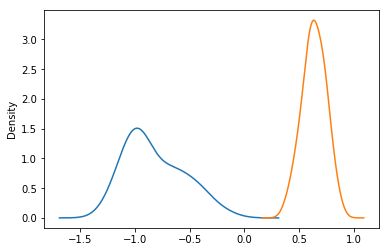

In [74]:
cellularities_df["Danaher_TMEcell"].dropna().plot(kind="kde")
cellularities_df["TumourCellularity_WES"].dropna().plot(kind="kde")

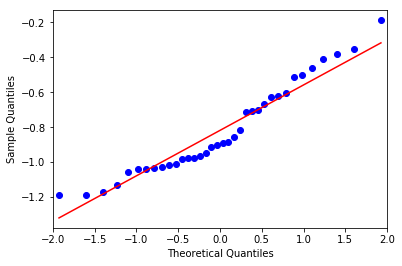

In [75]:
f = qqplot(cellularities_df["Danaher_TMEcell"].dropna(),line='s')

In [76]:
scipy.stats.anderson(cellularities_df["Danaher_TMEcell"].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.865927915700297, critical_values=array([0.528, 0.601, 0.721, 0.841, 1.   ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [77]:
cellularities_df.head()

,TumourCellularity_WES,Bindea_TMEcell,Davoli_TMEcell,Danaher_TMEcell,MCP_TMEcell,xcell_TMEcell,CIBERSORT_abs_TMEcell,ConsensusTMEcell
A01,0.5973,0.749201,0.009751,-0.498688,52.921805,0.6438,0.663951,0.367304
A02,0.5065,0.991710,0.363342,-0.378338,54.331328,0.6449,0.637033,0.537367
A03,0.4551,1.059214,0.260787,-0.349832,54.552966,0.7916,0.650632,0.557882
A04,0.6496,0.809765,-0.181239,-1.030722,50.375172,0.3556,0.580156,0.084694
A05,0.6706,0.725904,-0.153725,-0.711740,50.768222,0.4743,0.592368,0.141332


In [78]:
x = cellularities_df["TumourCellularity_WES"]

correlations = []
for cellularity_estimate in cellularities_df:
    
    if cellularity_estimate != "TumourCellularity_WES":
    
        y = cellularities_df[cellularity_estimate]
    
        print(cellularity_estimate+"\n")

        n1 = scipy.stats.shapiro(x)[1]
        n2 = scipy.stats.shapiro(y)[1]

        n3 = scipy.stats.normaltest(x)[1]
        n4 = scipy.stats.normaltest(y)[1]

        n5 = scipy.stats.anderson(x)
        n6 = scipy.stats.anderson(y)

        if min([n1,n2,n3,n4]) < 0.05: # not normal
            
            print("NOT normal")

            h1 = scipy.stats.levene(x, y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
                #print(h1)
            else:
                print("HOMOscedastic\n")

        else:
            
            print("Normal")

            h1 = scipy.stats.bartlett(x,y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
            else:
                print("HOMOscedastic\n")

        if min([n1,n2,n3,n4,h1]) < 0.05:

            print("KENDALL")

            print(scipy.stats.kendalltau(x,y)[1])
            
            #print(x)
            
            #print(y)
            
            cor, p_val = scipy.stats.kendalltau(x,y, method="exact")

        else:

            print("anderson")

            print(n5[0], n5[1])
            print(n6[0], n6[1])
            print("\n")

            print("PEARSON")
            print(scipy.stats.pearsonr(x,y)[1])
            
            cor, p_val = scipy.stats.pearsonr(x,y)
                
            print("\n")
            
        correlations.append([cellularity_estimate,cor,p_val])

Bindea_TMEcell

Normal
HETEROscedastic

KENDALL
7.122056081351193e-07
Davoli_TMEcell

Normal
HETEROscedastic

KENDALL
1.6912229241424596e-07
Danaher_TMEcell

NOT normal
HETEROscedastic

KENDALL
1.630365470900112e-06
MCP_TMEcell

Normal
HETEROscedastic

KENDALL
3.5019028537897913e-07
xcell_TMEcell

Normal
HETEROscedastic

KENDALL
5.922815440129157e-08
CIBERSORT_abs_TMEcell

Normal
HETEROscedastic

KENDALL
4.6618704897917253e-07
ConsensusTMEcell

Normal
HETEROscedastic

KENDALL
8.022036861490288e-08


In [79]:
x = cellularities_df["TumourCellularity_WES"]

correlations = []
for cellularity_estimate in cellularities_df:
    
    if cellularity_estimate != "TumourCellularity_WES":
    
        y = cellularities_df[cellularity_estimate]
    
        print(cellularity_estimate+"\n")

        n1 = scipy.stats.shapiro(x)[1]
        n2 = scipy.stats.shapiro(y)[1]

        n3 = scipy.stats.normaltest(x)[1]
        n4 = scipy.stats.normaltest(y)[1]

        n5 = scipy.stats.anderson(x)
        n6 = scipy.stats.anderson(y)

        if min([n1,n2,n3,n4]) < 0.05: # not normal
            
            print("NOT normal")

            h1 = scipy.stats.levene(x, y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
                #print(h1)
            else:
                print("HOMOscedastic\n")

        else:
            
            print("Normal")

            h1 = scipy.stats.bartlett(x,y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
            else:
                print("HOMOscedastic\n")

        if min([n1,n2,n3,n4,h1]) < 0.05:

            print("KENDALL")

            print(scipy.stats.kendalltau(x,y)[1])
            
            #print(x)
            
            #print(y)
            
            cor, p_val = scipy.stats.kendalltau(x,y)

        else:

            print("anderson")

            print(n5[0], n5[1])
            print(n6[0], n6[1])
            print("\n")

            print("PEARSON")
            print(scipy.stats.pearsonr(x,y)[1])
            
            cor, p_val = scipy.stats.pearsonr(x,y)
                
            print("\n")
            
        correlations.append([cellularity_estimate,cor,p_val])

Bindea_TMEcell

Normal
HETEROscedastic

KENDALL
7.122056081351193e-07
Davoli_TMEcell

Normal
HETEROscedastic

KENDALL
1.6912229241424596e-07
Danaher_TMEcell

NOT normal
HETEROscedastic

KENDALL
1.630365470900112e-06
MCP_TMEcell

Normal
HETEROscedastic

KENDALL
3.5019028537897913e-07
xcell_TMEcell

Normal
HETEROscedastic

KENDALL
5.922815440129157e-08
CIBERSORT_abs_TMEcell

Normal
HETEROscedastic

KENDALL
4.6618704897917253e-07
ConsensusTMEcell

Normal
HETEROscedastic

KENDALL
8.022036861490288e-08


In [80]:
correlations

[['Bindea_TMEcell', -0.5777777777777778, 7.122056081351193e-07],
 ['Davoli_TMEcell', -0.6095238095238096, 1.6912229241424596e-07],
 ['Danaher_TMEcell', -0.5587301587301587, 1.630365470900112e-06],
 ['MCP_TMEcell', -0.5936507936507937, 3.5019028537897913e-07],
 ['xcell_TMEcell', -0.6317460317460318, 5.922815440129157e-08],
 ['CIBERSORT_abs_TMEcell', -0.5873015873015873, 4.6618704897917253e-07],
 ['ConsensusTMEcell', -0.6253968253968255, 8.022036861490288e-08]]

In [81]:
pvals = [corr[2] for corr in correlations]

pvals

[7.122056081351193e-07,
 1.6912229241424596e-07,
 1.630365470900112e-06,
 3.5019028537897913e-07,
 5.922815440129157e-08,
 4.6618704897917253e-07,
 8.022036861490288e-08]

### Save data frame

In [83]:
FILE = '../../Data/3/WES_TumourCellularity_mRNA_TMEcellularity_estimations.txt'

cellularities_df.to_csv(FILE, sep='\t')

## Plot barplot correlations

### Define method colour

In [84]:
method_colours = dict({
    'cib':      '#6FCCDD',
    'mcp':      '#B9529F',
    'danaher':  '#0E8040',
    'xCELL':    '#F7931D',
    'bindea':   '#F6EB16',
    'davoli':   '#231F20',
    'Consensus':'#3953A4',
    'TIMER':    '#FF0000'
})

In [85]:
correlations_dict = {m[0]: {'cor': m[1]} for m in correlations}

In [86]:
correlations_df = pd.DataFrame.from_dict(correlations_dict)

correlations_df.sort_values(by=['cor'],
                            axis='columns',
                            inplace=True)

In [87]:
correlations_df

,xcell_TMEcell,ConsensusTMEcell,Davoli_TMEcell,MCP_TMEcell,CIBERSORT_abs_TMEcell,Bindea_TMEcell,Danaher_TMEcell
cor,-0.631746,-0.625397,-0.609524,-0.593651,-0.587302,-0.577778,-0.55873


In [92]:
m_order = ['xCELL','Consensus','davoli','mcp','cib','bindea','danaher']
bar_colors = [method_colours[col] for col in m_order]

bar_colors

['#F7931D', '#3953A4', '#231F20', '#B9529F', '#6FCCDD', '#F6EB16', '#0E8040']

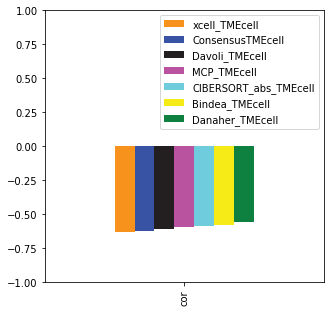

In [93]:
ax = correlations_df.plot(kind='bar',
                          color=bar_colors,
                          figsize=(5,5),
                          ylim=(-1,1))

In [94]:
fig = ax.get_figure()

In [96]:
ls ../../Figures/main/3/panels/

In [97]:
FILE = "../../Figures/main/3/panels/3a_TxNaive_WES_TME_vs_RNA_TME_tau.pdf"

fig.savefig(FILE, bbox_tight=True)

## Plot correlations

In [100]:
cellularities_df.head()

,TumourCellularity_WES,Bindea_TMEcell,Davoli_TMEcell,Danaher_TMEcell,MCP_TMEcell,xcell_TMEcell,CIBERSORT_abs_TMEcell,ConsensusTMEcell
A01,0.5973,0.749201,0.009751,-0.498688,52.921805,0.6438,0.663951,0.367304
A02,0.5065,0.991710,0.363342,-0.378338,54.331328,0.6449,0.637033,0.537367
A03,0.4551,1.059214,0.260787,-0.349832,54.552966,0.7916,0.650632,0.557882
A04,0.6496,0.809765,-0.181239,-1.030722,50.375172,0.3556,0.580156,0.084694
A05,0.6706,0.725904,-0.153725,-0.711740,50.768222,0.4743,0.592368,0.141332


### Define method colour

In [101]:
method_colours = dict({
    'CIBERSORT_abs_TMEcell':'#6FCCDD',
    'MCP_TMEcell':          '#B9529F',
    'Danaher_TMEcell':      '#0E8040',
    'xcell_TMEcell':        '#F7931D',
    'Bindea_TMEcell':       '#F6EB16',
    'Davoli_TMEcell':       '#231F20',
    'ConsensusTMEcell':     '#3953A4',
})

In [102]:
cellularities_norm_dict = dict({m:None for m in cellularities_df})

In [103]:
cellularities_norm_dict['TumourCellularity_WES'] = list(cellularities_df['TumourCellularity_WES'])
cellularities_norm_dict['Samples'] = list(cellularities_df.index)

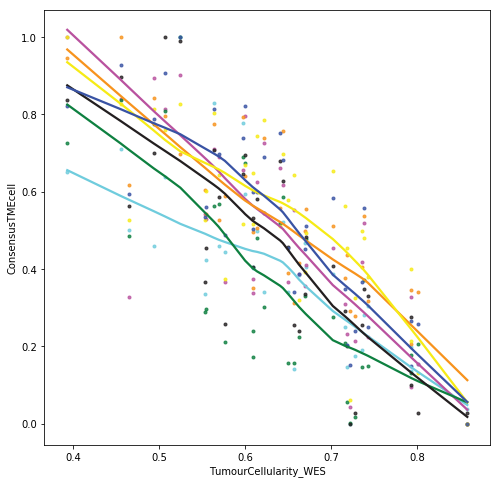

In [104]:
fig = plt.figure(figsize=(8,8))

for m in method_colours:  
    
    rna = (cellularities_df[m] - cellularities_df[m].min()) / (cellularities_df[m].max() - cellularities_df[m].min())
    wes = cellularities_df['TumourCellularity_WES']
    
    cellularities_norm_dict[m] = list(rna)
    
    ax = sns.regplot(
        x=wes,
        y=rna,
        color=method_colours[m],
        truncate=True,
        scatter=True,
        marker='.',
        ci=None,
        lowess=True
    )

In [105]:
cellularities_norm_df = pd.DataFrame.from_dict(cellularities_norm_dict)

In [106]:
cellularities_norm_df.set_index('Samples',
                                inplace=True)

In [107]:
cellularities_norm_df.head()

,TumourCellularity_WES,Bindea_TMEcell,Davoli_TMEcell,Danaher_TMEcell,MCP_TMEcell,xcell_TMEcell,CIBERSORT_abs_TMEcell,ConsensusTMEcell
Samples,,,,,,,,
A01,0.5973,0.517135,0.646409,0.689128,0.654520,0.792997,0.778520,0.737524
A02,0.5065,0.759644,1.000000,0.809477,0.814212,0.794538,0.638162,0.907588
A03,0.4551,0.827148,0.897445,0.837984,0.839322,1.000000,0.709069,0.928102
A04,0.6496,0.577699,0.455419,0.157094,0.365998,0.389356,0.341593,0.454914
A05,0.6706,0.493838,0.482933,0.476076,0.410529,0.555602,0.405267,0.511552


### Save normalised data frame

In [ ]:
FILE = '../../Data/3/WES_TumourCellularity_mRNA_TMEcellularity_norm_estimations.txt'

cellularities_norm_df.to_csv(FILE, sep='\t')

# End script